In [458]:
%matplotlib inline
%pylab inline
from numpy import *

Populating the interactive namespace from numpy and matplotlib


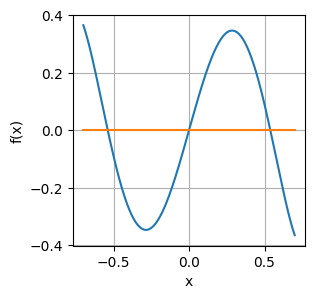

In [459]:
# Fixed point method
f = lambda x : x/8 * (63*x**4 - 70*x**2 +15)
n = 1000
# case1: (0.4 0.7)
# case2: (0.75 0.95)
# case3: (-0.25 0.25)
# case4: (-0.7 0.7)
a= -0.7
b = 0.7
x = linspace(a,b,n)
c = zeros_like(x)
figsize(3,3)
plot(x,f(x))
plot(x,c)
xlabel('x')
ylabel('f(x)')
grid()

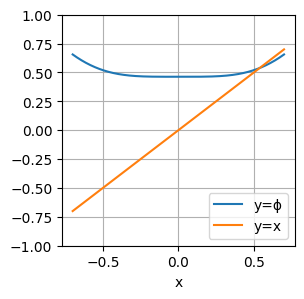

In [460]:
#phi = lambda x : 63./70.*x**3 + 15./(70.*x) #case1
#phi = lambda x : 70.0/(63.*x) - 15/(63*x**3) #case2
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5 #case3
phi = lambda x : sqrt((63.*x**4 + 15.0)/70.) #case4
plot(x,phi(x),label='y=ϕ')
xlabel('x')
plot(x,x,label='y=x')
ylim(-1,1)
legend()
grid()

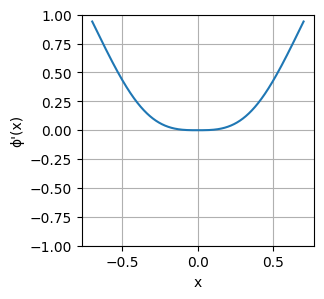

In [461]:
#phi_prime = lambda x : 63./70.*3*x**2 - 15./(70.*x**2) #case1
#phi_prime = lambda x : -70./(63*x**2) + 15.*3./(63.*x**4) #case2
#phi_prime = lambda x : 70./15.0*3*x**2 - 63.0/15.0*5*x**4 #case3
phi_prime = lambda x : 1.0/(2.0*sqrt((63.*x**4 + 15.0)/70.))*(63.*4*x**3/70.) #case4

plot(x,abs(phi_prime(x)))
xlabel('x')
ylabel('ϕ\'(x)')
ylim(-1,1)
grid()

In [462]:
def fixed_point(phi,x0,eps=1e-10,n_max=1000):
  x = x0
  err = 1.
  errors = [err]
  it = 0
  while (err > eps and it < n_max):
    x_new = phi(x)
    err = abs(x_new - x)
    x = x_new
    it +=1
    errors.append(err)
  semilogy(errors)
  return(errors,x)

Solution fixed point:  0.5384693100128499


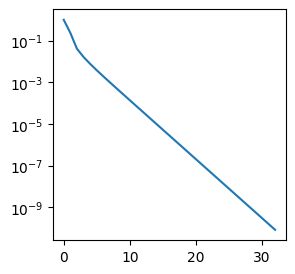

In [463]:
errors_fixed, x_fixed = fixed_point(phi,0.23)
print('Solution fixed point: ', x_fixed)

In [464]:
# Let's compare the scipy implmentation of the method with our implementation
import scipy.optimize as opt
opt.fixed_point(phi, 0.6, xtol=1e-10, maxiter=1000)

array(0.53846931)

4745.087199664209
6051.288176908856
8521.523173747235


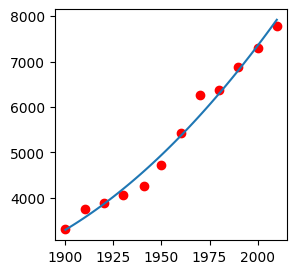

In [465]:
# Least squares

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

n = len(year)
B = matrix([ones(n),year, year**2]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B,BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2

plot(xx,f(xx))
scatter(year,population, color= 'r',marker='o')

print(f(1945))
print(f(1975))
print(f(2020))

26802353.274437316 -40923.77128624008 20.806645395172925 -0.0035217535289880923


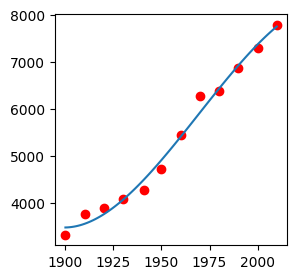

In [466]:
# Try to reimplement the problem changing the order (3) of the polynomial fitting

B = matrix([ones(n), year, year**2, year**3]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
a3 = float(a[3])
print(a0, a1, a2, a3)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2 + a3*x**3

plot(xx, f(xx))
scatter(year, population, color='r')

-76819.30809749143 42.02023345850122


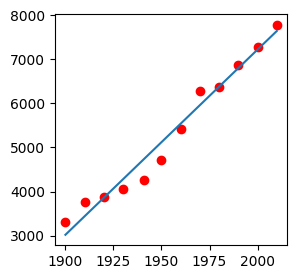

In [467]:
# Try to reimplement the problem changing the order (1) of the polynomial fitting

B = matrix([ones(n), year]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
print(a0, a1)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x

plot(xx, f(xx))
scatter(year, population, color='r')

Coefficients:  [ 5.09509452e-06 -4.98502550e-02  1.95070275e+02 -3.81621814e+05
  3.73244589e+08 -1.46003062e+11]


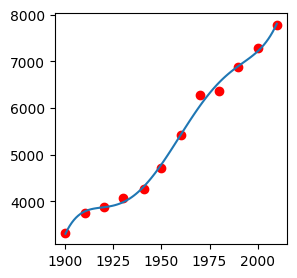

In [468]:
# Try to compare the results with the one obtained with the numpy polynomial fitting tool (polyfit)

a = polyfit(year, population, 5)
print('Coefficients: ',a)
f = poly1d(a)
plot(xx, f(xx))
scatter(year, population, color='r')